<h2 style="text-align:center;font-weight:bold">Employee Churn Analysis</h2>

### Libraries

Setting up the environment and loading the major libraries needed for this data analysis. 

As reported by ProjectPro (2023) "Python is a prevalent general-purpose programming language commonly used for data visualization in the data science community."

In [1]:
# Suppress warnings.
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package.
import numpy as np
import pandas as pd

# Import the mglearn package.
import mglearn

# Visualisation Libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<h2 style="text-align:center;font-weight:bold">Exploratory Data Analysis (EDA) </h2>

In [2]:
# Checking missing value formats and read data.
missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
df = pd.read_csv("HR_comma_sep.csv", na_values=missing_value_formats)

# Checking missing values.
if df.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

# Display first and last 5 records.
display(df.head())
display(df.tail())

# Display shape.
print("Shape of the dataset:", df.shape)
print("\nInformation about the dataset:\n")

# Returns the info.
df.info()

No missing values.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


Shape of the dataset: (14999, 10)

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In accordance with Roddewig (2022) "Duplicate data takes up unnecessary storage space and slows down calculations at a minimum. At worst, duplicate data can skew analysis results and threaten the integrity of the data set."

In [3]:
# Check for duplicate rows.
duplicate_rows_df = df[df.duplicated()]
shape_before_removal = df.shape # Get the shape of the dataframe before removing duplicates.
df = df.drop_duplicates() # Remove duplicate rows from the dataframe.
shape_after_removal = df.shape # Get the shape of the dataframe after removing duplicates.

# Print the number of duplicate rows found and additional information.
if duplicate_rows_df.shape[0] > 0:
    print("The dataset contains", duplicate_rows_df.shape[0], "duplicate rows.")
else:
    print("No duplicate rows were found in the dataset.")
print("Shape before removing duplicates:", shape_before_removal)
print("Shape after removing duplicates:", shape_after_removal)

The dataset contains 3008 duplicate rows.
Shape before removing duplicates: (14999, 10)
Shape after removing duplicates: (11991, 10)


In [4]:
df = df.rename(columns={
    'satisfaction_level': 'Satisfaction Level',
    'last_evaluation': 'Last Evaluation',
    'number_project': 'Number of Projects',
    'average_montly_hours': 'Average Monthly Hours',
    'time_spend_company': 'Time Spent in Company',
    'Work_accident': 'Work Accident',
    'left': 'Left',
    'promotion_last_5years': 'Promotion Last 5 Years',
    'sales': 'Department',
    'salary': 'Salary'
})
# Print the column names.
print("Column names:")
print(df.columns)

Column names:
Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Average Monthly Hours', 'Time Spent in Company', 'Work Accident',
       'Left', 'Promotion Last 5 Years', 'Department', 'Salary'],
      dtype='object')


### Descriptive Statistics 

In [5]:
# Viewing some statistical information.
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Satisfaction Level,11991.0,0.63,0.24,0.09,0.48,0.66,0.82,1.0
Last Evaluation,11991.0,0.72,0.17,0.36,0.57,0.72,0.86,1.0
Number of Projects,11991.0,3.80,1.16,2.00,3.00,4.00,5.00,7.0
Average Monthly Hours,11991.0,200.47,48.73,96.00,157.00,200.00,243.00,310.0
Time Spent in Company,11991.0,3.36,1.33,2.00,3.00,3.00,4.00,10.0
Work Accident,11991.0,0.15,0.36,0.00,0.00,0.00,0.00,1.0
Left,11991.0,0.17,0.37,0.00,0.00,0.00,0.00,1.0
Promotion Last 5 Years,11991.0,0.02,0.13,0.00,0.00,0.00,0.00,1.0


**Satisfaction Level**: With an average of 0.61, it is possible to infer that, in general, employees have a reasonable level of satisfaction. This may indicate that the company is providing a satisfactory work environment.


**Last Evaluation**: With an average of 0.72, it is suggested that employees, on average, receive positive reviews. This may indicate that the company has an adequate evaluation system in place and that employees are being recognized for their performance.


**Number of Projects**: An average of 4 projects suggests that most employees are involved in multiple projects. This could indicate that the workload is high and employees have to deal with multiple demands simultaneously.


**Average Hours Monthly**: With an average of 201.05 hours, it is suggested that employees work a considerable amount of hours on average. This could indicate that the company has an intense work culture or that employees are overworked.


**Time Spent in Company**: The median of 3 years suggests that half of employees spend at least 3 years at the company. This may indicate that the company has a reasonable employee retention rate.


**Work Accident**: With an average rate of accidents at work of 0.14, it is suggested that there is a low incidence of reported accidents. This may indicate that the company has effective security measures in place and a safe work environment.

In [6]:
# Viewing some statistical information.
df.describe(include='object').T

,count,unique,top,freq
Department,11991,10,sales,3239
Salary,11991,3,low,5740


<h3 style="text-align:center;font-weight:bold">Data Visualizations</h3>

### How many departments can be found in our dataset?

In [7]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
df['Department'] = df['Department'].str.upper()

    Department  Percentage
0        SALES   27.011926
1    TECHNICAL   18.714036
2      SUPPORT   15.186390
3           IT    8.139438
4        RANDD    5.787674
5  PRODUCT_MNG    5.720957
6    MARKETING    5.612543
7   ACCOUNTING    5.178884
8           HR    5.012092
9   MANAGEMENT    3.636060


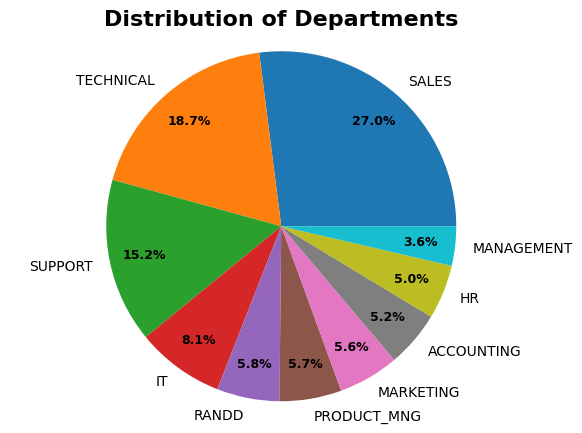

In [9]:
department_counts = df['Department'].value_counts() # Calculating the department counts.
department_percentages = (department_counts / department_counts.sum()) * 100 # Calculating the department percentages.

# Creating a new DataFrame with department names and percentages.
department_table = pd.DataFrame({'Department': department_percentages.index,
                                'Percentage': department_percentages.values})

# Sorting the table by department percentages in descending order.
department_table = department_table.sort_values(by='Percentage', ascending=False)
print(department_table)

department_counts = df['Department'].value_counts()
departments = department_counts.index
counts = department_counts.values
plt.figure(figsize=(7, 5))
_, _, autotexts = plt.pie(counts, labels=departments, autopct='%1.1f%%', pctdistance=0.80)
plt.setp(autotexts, size=9, weight='bold')
plt.title("Distribution of Departments", fontweight='bold', fontsize=16)
plt.axis('equal')
plt.show()

* We can see that the three departments with the highest percentage are Sales (27.01%), Technical (18.71%) and Support (15.19%). These departments represent a significant proportion of the company's workforce.


* The IT (Information Technology) department represents 8.14% of the company's workforce. This may indicate that the company values technology and innovation.


* Although the HR department accounts for 5.01% of the workforce, it plays a key role in the company's human resource management.

### What are the categories of our salary feature?

In [10]:
df['Salary'].value_counts()

low       5740
medium    5261
high       990
Name: Salary, dtype: int64

In [11]:
df['Salary'] = df['Salary'].str.upper()

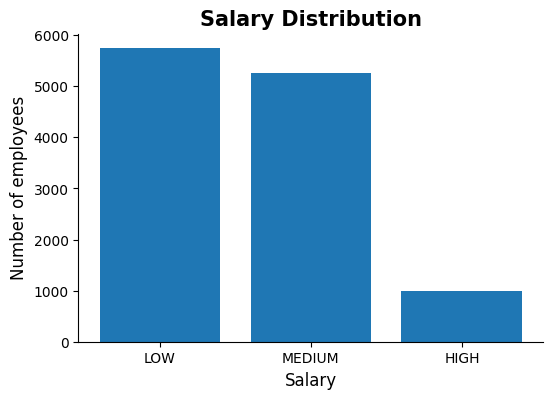

In [12]:
salary_counts = df['Salary'].value_counts()
salary_labels = salary_counts.index.tolist()
plt.figure(figsize=(6, 4))
ax = plt.gca() 
plt.bar(salary_labels, salary_counts)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Number of employees', fontsize=12)
plt.title('Salary Distribution', fontweight='bold', fontsize=15)
plt.show()

Indeed, analyzing the salary data as mentioned (low, medium, and high) and considering the income distribution (5740, 5261, and 990, respectively), it is evident that a significant disparity exists between the number of employees in each salary category. This observation raises concerns about salary inequality within the company, which can have several implications.

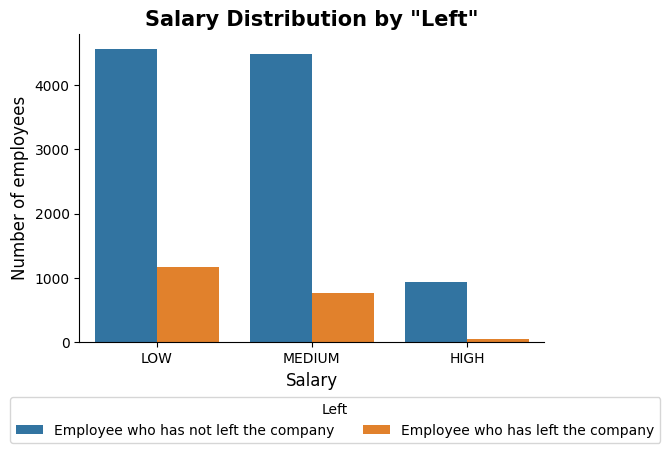

In [13]:
left_labels = {0: 'Employee who has not left the company', 1: 'Employee who has left the company'}
plt.figure(figsize=(6, 4))
ax = plt.gca()
sns.countplot(data=df, x='Salary', hue='Left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Number of employees', fontsize=12)
plt.title('Salary Distribution by "Left"', fontweight='bold', fontsize=15)
plt.legend(title='Left', labels=left_labels.values(), bbox_to_anchor=(0.55, -0.35), loc='lower center', ncol=len(left_labels))
plt.show()

In [14]:
left_employees = df[df['Left'] == 1]  
high_salary_employees = left_employees[left_employees['Salary'] == 'HIGH'] 
count_high_salary_employees = len(high_salary_employees)  
print(f"{count_high_salary_employees} employees who left the company had a high salary.")

48 employees who left the company had a high salary.


It is evident that a significant majority of employees who decide to leave the company have lower wages, but 48 employees who left the company had a high salary. This observation underscores the crucial role of the wage column in any future implementation of a machine learning model designed to predict employee turnover.

### Which department presents the highest/lowest salaries?

In [15]:
salary_data = df.groupby(['Department', 'Salary'])['Salary'].count()
print (salary_data)

Department   Salary
ACCOUNTING   HIGH        63
             LOW        296
             MEDIUM     262
HR           HIGH        38
             LOW        296
             MEDIUM     267
IT           HIGH        71
             LOW        476
             MEDIUM     429
MANAGEMENT   HIGH       128
             LOW        139
             MEDIUM     169
MARKETING    HIGH        62
             LOW        310
             MEDIUM     301
PRODUCT_MNG  HIGH        52
             LOW        343
             MEDIUM     291
RANDD        HIGH        47
             LOW        322
             MEDIUM     325
SALES        HIGH       237
             LOW       1553
             MEDIUM    1449
SUPPORT      HIGH       126
             LOW        867
             MEDIUM     828
TECHNICAL    HIGH       166
             LOW       1138
             MEDIUM     940
Name: Salary, dtype: int64


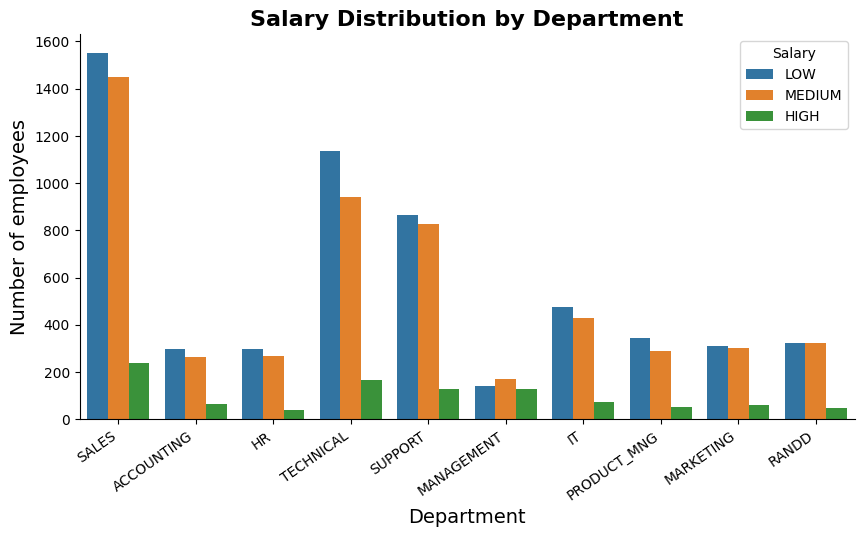

In [16]:
plt.figure(figsize=(10, 5))
ax = plt.gca()
sns.countplot(x='Department', hue='Salary', data=df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of employees', fontsize=14)
plt.title('Salary Distribution by Department', fontweight='bold', fontsize=16)
plt.legend(title='Salary', fontsize=10)
plt.show()

* Departments like "Sales," "Technical," and "Support" have a larger number of employees with low and medium salaries, while departments like "IT," "R&D," and "Management" have a higher proportion of employees with higher salaries.


* Departments with a higher concentration of employees earning lower salaries, such as "Sales," "Technical," and "Support," may face a higher risk of employee turnover. 


* The "Management" department stands out with a relatively smaller workforce but a higher proportion of employees earning higher salaries. 

### How many employees left the company by department?

In [17]:
left_data = df.groupby(['Department', 'Left'])['Left'].count()
left_data

Department   Left
ACCOUNTING   0        512
             1        109
HR           0        488
             1        113
IT           0        818
             1        158
MANAGEMENT   0        384
             1         52
MARKETING    0        561
             1        112
PRODUCT_MNG  0        576
             1        110
RANDD        0        609
             1         85
SALES        0       2689
             1        550
SUPPORT      0       1509
             1        312
TECHNICAL    0       1854
             1        390
Name: Left, dtype: int64

In [18]:
count_by_department = df['Department'].value_counts()
percentage_left = df[df['Left'] == 1].groupby('Department').size() / count_by_department * 100
percentage_retained = df[df['Left'] == 0].groupby('Department').size() / count_by_department * 100
table = pd.DataFrame({'Department': count_by_department.index,
                      'Percentage Left': percentage_left.values,
                      'Percentage Retained': percentage_retained.values})
print(table)

    Department  Percentage Left  Percentage Retained
0        SALES        17.552335            82.447665
1    TECHNICAL        18.801997            81.198003
2      SUPPORT        16.188525            83.811475
3           IT        11.926606            88.073394
4        RANDD        16.641902            83.358098
5  PRODUCT_MNG        16.034985            83.965015
6    MARKETING        12.247839            87.752161
7   ACCOUNTING        16.980550            83.019450
8           HR        17.133443            82.866557
9   MANAGEMENT        17.379679            82.620321


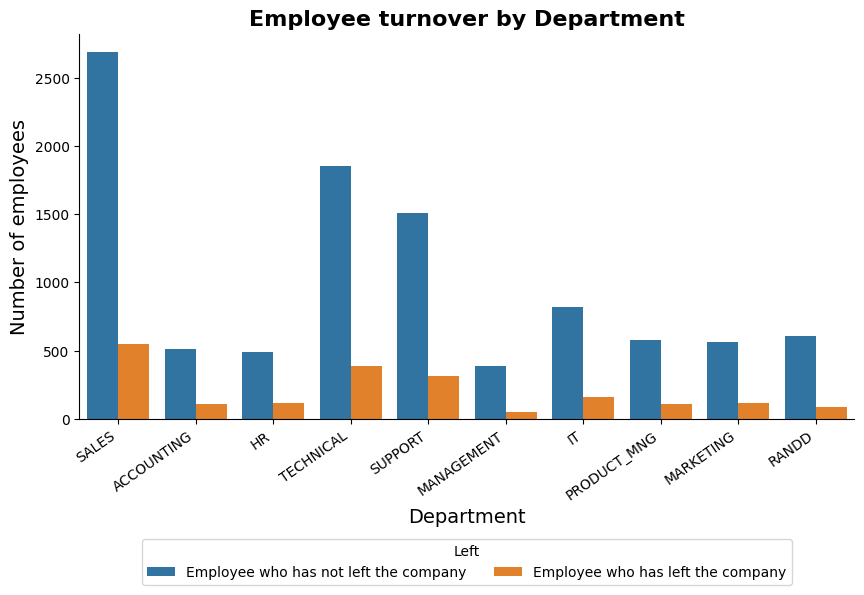

In [19]:
left_labels = {0: 'Employee who has not left the company', 1: 'Employee who has left the company'}
plt.figure(figsize=(10, 5))
ax = plt.gca()
sns.countplot(x='Department', hue='Left', data=df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of employees', fontsize=14)
plt.title('Employee turnover by Department', fontweight='bold', fontsize=16)
plt.legend(title='Left', labels=left_labels.values(), bbox_to_anchor=(0.50, -0.45), loc='lower center', ncol=len(left_labels))
plt.show()

* The IT area had the lowest percentage of employees who left the company, with only 11.9%. This indicates greater employee retention in that department.


* The Marketing and Management departments also had a low exit rate of 12.2% and 17.4%, respectively. This suggests that these departments have a greater ability to retain their employees.


* On the other hand, the Support, Sales and HR areas had the highest percentages of employees who left the company, 16.2%, 17.6% and 17.1%, respectively. These departments may need special attention to improve employee retention.


* Technical, R&D, and product management departments had a relatively even percentage of employees who lost business, around 16-18%. This indicates that these departments may have an average employee turnover rate.

### Who was promoted in the last 5 years and left the company?

In [20]:
promoted_and_left = df[(df['Promotion Last 5 Years'] == 1) & (df['Left'] == 1)]
num_promoted_and_left = promoted_and_left.shape[0]
print(f"The number of employees who were promoted in the last 5 years and who lost the company is: {num_promoted_and_left}")

The number of employees who were promoted in the last 5 years and who lost the company is: 8


Although this number is relatively low compared to the total number of employees, it may still be relevant to investigate the circumstances of these departures. This analysis can provide insights into possible reasons promoted employees are leaving the company, such as dissatisfaction with their new load, lack of opportunities for growth, or other factors that may influence their decision to leave.

### How many employees got promoted in the last 5 years?

In [21]:
promoted_employees = df[df['Promotion Last 5 Years'] == 1]  
count_promoted_employees = len(promoted_employees)  
print(f"{count_promoted_employees} employees got promoted in the last 5 years.")

203 employees got promoted in the last 5 years.


In [22]:
total_employees = len(df)  
percentage_promoted = (count_promoted_employees / total_employees) * 100 

print(f"The percentage of employees promoted in the last 5 years is: {percentage_promoted:.2f}%")

The percentage of employees promoted in the last 5 years is: 1.69%


A promotion rate of 1.69% over the last 5 years can be considered relatively low. This indicates that a small percentage of employees were formed during this period. This information can be relevant when analyzing the relationship between promotions and turnover.

### How may projects were performed by department and who left the company? 

In [23]:
projects_by_department = df.groupby('Department')['Number of Projects'].sum()
employees_left_by_department = df[df['Left'] == 1].groupby('Department').size()

result = pd.DataFrame({
    'Projects Performed': projects_by_department,
    'Employees Left': employees_left_by_department
})
print(result)

             Projects Performed  Employees Left
Department                                     
ACCOUNTING                 2381             109
HR                         2209             113
IT                         3706             158
MANAGEMENT                 1673              52
MARKETING                  2504             112
PRODUCT_MNG                2603             110
RANDD                      2672              85
SALES                     12234             550
SUPPORT                    6958             312
TECHNICAL                  8660             390


In [24]:
left_employees = df[df['Left'] == 1]
projects_by_department = left_employees.groupby('Department')['Number of Projects'].mean()
average_projects_per_employee = left_employees['Number of Projects'].mean()
comparison = pd.DataFrame({
    'Projects Performed "Left"': projects_by_department,
    'Average Projects per Employee': average_projects_per_employee
})

print(comparison)


             Projects Performed "Left"  Average Projects per Employee
Department                                                           
ACCOUNTING                    3.954128                       3.883476
HR                            3.539823                       3.883476
IT                            3.930380                       3.883476
MANAGEMENT                    4.076923                       3.883476
MARKETING                     3.660714                       3.883476
PRODUCT_MNG                   3.800000                       3.883476
RANDD                         4.047059                       3.883476
SALES                         3.763636                       3.883476
SUPPORT                       3.967949                       3.883476
TECHNICAL                     4.071795                       3.883476


### Is there a correlation between lower levels of job satisfaction and higher rates of employee turnover?

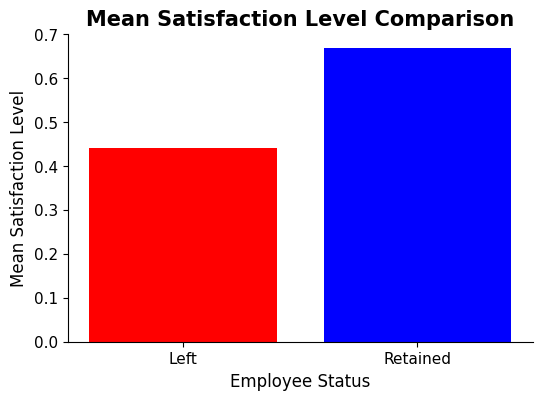

In [25]:
left_employees = df[df['Left'] == 1]
mean_satisfaction_left = left_employees['Satisfaction Level'].mean()
mean_satisfaction_retained = df[df['Left'] == 0]['Satisfaction Level'].mean()

plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.bar(['Left', 'Retained'], [mean_satisfaction_left, mean_satisfaction_retained], color=['red', 'blue'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Employee Status', fontsize=12)
plt.ylabel('Mean Satisfaction Level', fontsize=12)
plt.title('Mean Satisfaction Level Comparison', fontweight='bold', fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

It seems that employees who stay in the company have an average satisfaction level of 7, while those who leave have an average satisfaction level of 4.5. This suggests that there might be a correlation between lower satisfaction levels and employee turnover.